In [ ]:
!pip install transformers datasets matplotlib pandas seaborn

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import numpy as np

In [ ]:
# CoNLL-2003 dataset, which includes labeled data for Named Entity Recognition (NER)

dataset = load_dataset("conll2003")

In [ ]:

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


In [ ]:

train_data = dataset["train"]
print(train_data[0])

{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}


In [ ]:

print(dataset.shape)

{'train': (14041, 5), 'validation': (3250, 5), 'test': (3453, 5)}


In [ ]:
# list of NER tag names (e.g., "B-PER" for the beginning of a person name)

tag_names = train_data.features["ner_tags"].feature.names
tag_names

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']

In [ ]:

data = {
    'ID': [],
    'Tokens': [],
    'POS Tags': [],
    'Chunk Tags': [],
    'NER Tags': []
}

In [ ]:
# populating the dictionary with information
for i, example in enumerate(train_data):
    data['ID'].append(example['id'])
    data['Tokens'].append(example['tokens'])
    data['POS Tags'].append(example['pos_tags'])
    data['Chunk Tags'].append(example['chunk_tags'])
    data['NER Tags'].append(example['ner_tags'])

df = pd.DataFrame(data)

df.head()

,ID,Tokens,POS Tags,Chunk Tags,NER Tags
0,0,"[EU, rejects, German, call, to, boycott, Briti...","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[11, 21, 11, 12, 21, 22, 11, 12, 0]","[3, 0, 7, 0, 0, 0, 7, 0, 0]"
1,1,"[Peter, Blackburn]","[22, 22]","[11, 12]","[1, 2]"
2,2,"[BRUSSELS, 1996-08-22]","[22, 11]","[11, 12]","[5, 0]"
3,3,"[The, European, Commission, said, on, Thursday...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ..."
4,4,"[Germany, 's, representative, to, the, Europea...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...","[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ..."


In [ ]:

ner_tag_counts = {}
for example in train_data:
    for tag in example["ner_tags"]:
        tag_name = tag_names[tag]
        ner_tag_counts[tag_name] = ner_tag_counts.get(tag_name, 0) + 1
print(ner_tag_counts)

{'B-ORG': 6321, 'O': 169578, 'B-MISC': 3438, 'B-PER': 6600, 'I-PER': 4528, 'B-LOC': 7140, 'I-ORG': 3704, 'I-MISC': 1155, 'I-LOC': 1157}


In [ ]:

total_tags = sum(ner_tag_counts.values())
entity_distribution = {tag: count / total_tags * 100 for tag, count in ner_tag_counts.items()}
print("Entity Distribution (in %):", entity_distribution)


Entity Distribution (in %): {'B-ORG': 3.1042967080998523, 'O': 83.2811939829389, 'B-MISC': 1.6884309575142051, 'B-PER': 3.24131597428556, 'I-PER': 2.223739201752275, 'B-LOC': 3.506514553999833, 'I-ORG': 1.8190658134475326, 'I-MISC': 0.5672302954999731, 'I-LOC': 0.5682125124618777}


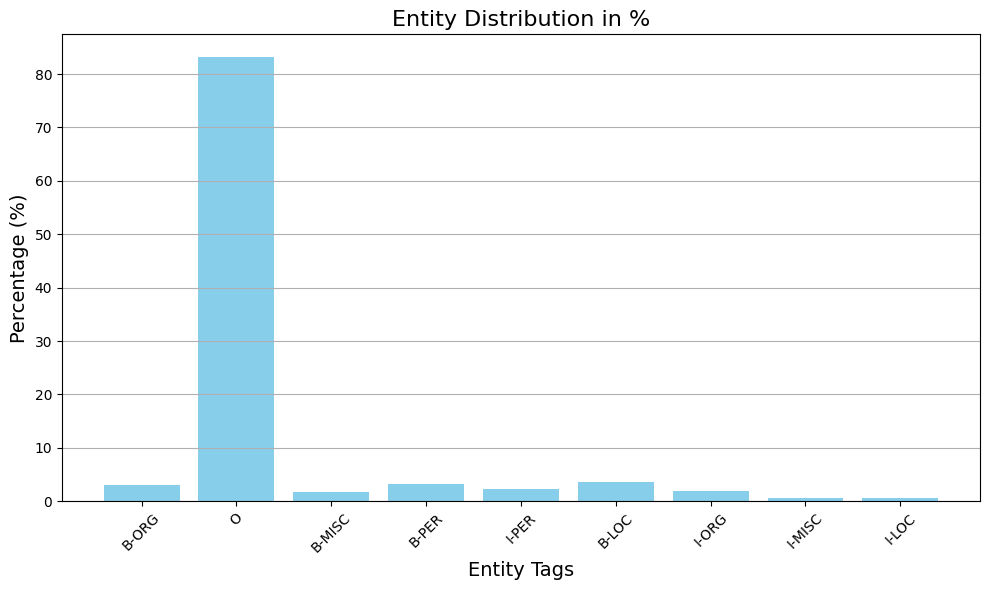

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(entity_distribution.keys(), entity_distribution.values(), color='skyblue')
plt.xlabel('Entity Tags', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Entity Distribution in %', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:

from collections import Counter

bio_tag_counts = Counter()
for tag in ner_tag_counts.keys():
    prefix = tag.split('-')[0]
    bio_tag_counts[prefix] += ner_tag_counts[tag]

print("BIO Tag Counts:", bio_tag_counts)


BIO Tag Counts: Counter({'O': 169578, 'B': 23499, 'I': 10544})


In [ ]:

sentence_lengths = [len(example["tokens"]) for example in dataset["train"]]
avg_length = np.mean(sentence_lengths)
max_length = np.max(sentence_lengths)

print(f"Average Sentence Length: {avg_length:.2f} tokens")
print(f"Maximum Sentence Length: {max_length} tokens")


Average Sentence Length: 14.50 tokens
Maximum Sentence Length: 113 tokens


In [ ]:


entity_word_freq = {tag: Counter() for tag in tag_names if tag != "O"}

for example in dataset["train"]:
    for token, tag in zip(example["tokens"], example["ner_tags"]):
        if tag_names[tag] != "O":
            entity_word_freq[tag_names[tag]].update([token.lower()])


for entity, counter in entity_word_freq.items():
    print(f"{entity} - Most common words:", counter.most_common(5))


B-PER - Most common words: [('clinton', 70), ('mark', 58), ('michael', 55), ('david', 50), ('paul', 50)]
I-PER - Most common words: [('ahmed', 41), ('akram', 37), ('de', 27), ('younis', 25), ('van', 24)]
B-ORG - Most common words: [('reuters', 79), ('new', 69), ('st', 60), ('chicago', 46), ('san', 42)]
I-ORG - Most common words: [('of', 104), ('newsroom', 70), ('inc', 60), ('york', 59), ('party', 49)]
B-LOC - Most common words: [('u.s.', 309), ('new', 166), ('london', 154), ('england', 144), ('germany', 142)]
I-LOC - Most common words: [('york', 103), ('africa', 59), ('kong', 59), ('republic', 58), ('states', 57)]
B-MISC - Most common words: [('german', 100), ('russian', 96), ('british', 81), ('french', 80), ('dutch', 64)]
I-MISC - Most common words: [('cup', 100), ('league', 90), ('open', 84), ('division', 52), ('of', 28)]


In [ ]:
from transformers import BertTokenizerFast, DataCollatorForTokenClassification,AutoModelForTokenClassification
from transformers import TrainingArguments, Trainer


In [ ]:

tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


In [ ]:

train_text = train_data[6]
tokenized_input = tokenizer(train_text["tokens"], is_split_into_words=True)

tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
word_ids = tokenized_input.word_ids()


In [ ]:
ner_tags_length = len(train_text['ner_tags'])
input_ids_length = len(tokenized_input["input_ids"])

print("Length of NER Tags:", ner_tags_length)
print("Length of Tokenized Input IDs:", input_ids_length)

if ner_tags_length == input_ids_length:
    print("The lengths match!")
else:
    print("The lengths do not match!")

Length of NER Tags: 25
Length of Tokenized Input IDs: 27
The lengths do not match!


In [ ]:
def tokenize_and_align(examples, label_all_tokens=True):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []

    # Iterate over each example in the batch
    for i, label in enumerate(examples["ner_tags"]):
        # getting word IDs mapping tokens of original words
        word_ids = tokenized_inputs.word_ids(batch_index=i)

        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])  # corresponding label for the token
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)

            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs



In [ ]:
dataset['train'][5]

{'id': '5',
 'tokens': ['"',
  'We',
  'do',
  "n't",
  'support',
  'any',
  'such',
  'recommendation',
  'because',
  'we',
  'do',
  "n't",
  'see',
  'any',
  'grounds',
  'for',
  'it',
  ',',
  '"',
  'the',
  'Commission',
  "'s",
  'chief',
  'spokesman',
  'Nikolaus',
  'van',
  'der',
  'Pas',
  'told',
  'a',
  'news',
  'briefing',
  '.'],
 'pos_tags': [0,
  28,
  41,
  30,
  37,
  12,
  16,
  21,
  15,
  28,
  41,
  30,
  37,
  12,
  24,
  15,
  28,
  6,
  0,
  12,
  22,
  27,
  16,
  21,
  22,
  22,
  14,
  22,
  38,
  12,
  21,
  21,
  7],
 'chunk_tags': [0,
  11,
  21,
  22,
  22,
  11,
  12,
  12,
  17,
  11,
  21,
  22,
  22,
  11,
  12,
  13,
  11,
  0,
  0,
  11,
  12,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  21,
  11,
  12,
  12,
  0],
 'ner_tags': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  1,
  2,
  2,
  2,
  0,
  0,
  0,
  0,
  0]}

In [ ]:
len(train_text['ner_tags']), len(tokenized_input["input_ids"])


(25, 27)

In [ ]:
ta = tokenize_and_align(dataset['train'][5:6])

for token, label in zip(tokenizer.convert_ids_to_tokens(ta["input_ids"][0]),ta["labels"][0]):
    print(f"{token:_<40} {label}")


[CLS]___________________________________ -100
"_______________________________________ 0
we______________________________________ 0
do______________________________________ 0
n_______________________________________ 0
'_______________________________________ 0
t_______________________________________ 0
support_________________________________ 0
any_____________________________________ 0
such____________________________________ 0
recommendation__________________________ 0
because_________________________________ 0
we______________________________________ 0
do______________________________________ 0
n_______________________________________ 0
'_______________________________________ 0
t_______________________________________ 0
see_____________________________________ 0
any_____________________________________ 0
grounds_________________________________ 0
for_____________________________________ 0
it______________________________________ 0
,_______________________________________ 0
"_______

In [ ]:
tokenized_datasets = dataset.map(tokenize_and_align, batched=True)

In [ ]:
tokenized_datasets['train'][115]

{'id': '115',
 'tokens': ['We', 'do', 'not', 'want', 'a', 'war', ',', 'God', 'forbid', '.'],
 'pos_tags': [28, 41, 30, 37, 12, 21, 6, 22, 37, 7],
 'chunk_tags': [11, 21, 22, 22, 11, 12, 0, 11, 21, 0],
 'ner_tags': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'input_ids': [101,
  2057,
  2079,
  2025,
  2215,
  1037,
  2162,
  1010,
  2643,
  27206,
  1012,
  102],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'labels': [-100, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -100]}

In [ ]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=9)


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
args = TrainingArguments(
"test-ner",
evaluation_strategy = "epoch",
learning_rate=2e-5,
per_device_train_batch_size=16,
per_device_eval_batch_size=16,
num_train_epochs=5,
weight_decay=0.01,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer)

In [ ]:
!pip install evaluate

In [ ]:
!pip install seqeval

In [ ]:
import evaluate
seqeval = evaluate.load('seqeval')

In [ ]:
sample = dataset['train'][5]
label_names = dataset['train'].features['ner_tags'].feature.names

In [ ]:
for i in sample['ner_tags']:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
1
2
2
2
0
0
0
0
0


In [ ]:
labels = [label_names[i] for i in sample["ner_tags"]]
labels

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-ORG',
 'O',
 'O',
 'O',
 'B-PER',
 'I-PER',
 'I-PER',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'O']

In [ ]:
seqeval.compute(predictions=[labels], references=[labels])

{'ORG': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'PER': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [ ]:
# for metric evaluations
def metrics(eval_preds):
    pred_logits, labels = eval_preds

    pred_logits = np.argmax(pred_logits, axis=2)
    predictions = [
        [label_names[eval_preds] for (eval_preds, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(pred_logits, labels)
    ]

    true_labels = [
      [label_names[l] for (eval_preds, l) in zip(prediction, label) if l != -100]
       for prediction, label in zip(pred_logits, labels)
   ]
    results = seqeval.compute(predictions=predictions, references=true_labels)

    return {
          "accuracy": results["overall_accuracy"],
          "precision": results["overall_precision"],
          "f1": results["overall_f1"],
          "recall": results["overall_recall"]
  }


In [ ]:
trainer = Trainer(
   model,
   args,
   train_dataset=tokenized_datasets["train"],
   eval_dataset=tokenized_datasets["validation"],
   data_collator=data_collator,
   tokenizer=tokenizer,
   compute_metrics=metrics
)

<ipython-input-81-5517e49556dc>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,F1,Recall
1,0.225700,0.062584,0.982557,0.920587,0.923257,0.925942
2,0.046300,0.060157,0.984892,0.929116,0.935208,0.941380
3,0.025900,0.057660,0.986465,0.943329,0.944646,0.945967
4,0.015000,0.061390,0.986544,0.934513,0.942905,0.951449
5,0.010500,0.061905,0.987068,0.941359,0.946543,0.951784


TrainOutput(global_step=4390, training_loss=0.05169354093373501, metrics={'train_runtime': 921.6144, 'train_samples_per_second': 76.176, 'train_steps_per_second': 4.763, 'total_flos': 1702317283240608.0, 'train_loss': 0.05169354093373501, 'epoch': 5.0})

In [ ]:
# saving fine-tuned model and tokenizer

model.save_pretrained("bert_model")
tokenizer.save_pretrained("tokenizer")


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [ ]:
# mapping for labels to ID and ID to labels for model configuration

tolabelfromid = {
    str(i): label for i,label in enumerate(label_names)
}
toidfromlabel = {
    label: str(i) for i,label in enumerate(label_names)
}

In [ ]:
import json
config = json.load(open("bert_model/config.json"))
config["tolabelfromid"] = tolabelfromid
config["toidfromlabel"] = toidfromlabel
json.dump(config, open("bert_model/config.json","w"))

In [ ]:

model_fine_tuned = AutoModelForTokenClassification.from_pretrained("bert_model")

In [ ]:
# pipeline

from transformers import pipeline

nlp = pipeline("ner", model=model_fine_tuned, tokenizer=tokenizer)


# sample
example_text = "India won world cup in 2011"

results = nlp(example_text)

print(results)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'entity': 'LABEL_3', 'score': 0.1471113, 'index': 1, 'word': 'india', 'start': 0, 'end': 5}, {'entity': 'LABEL_5', 'score': 0.1542741, 'index': 2, 'word': 'won', 'start': 6, 'end': 9}, {'entity': 'LABEL_3', 'score': 0.16806695, 'index': 3, 'word': 'world', 'start': 10, 'end': 15}, {'entity': 'LABEL_3', 'score': 0.18805732, 'index': 4, 'word': 'cup', 'start': 16, 'end': 19}, {'entity': 'LABEL_5', 'score': 0.17571953, 'index': 5, 'word': 'in', 'start': 20, 'end': 22}, {'entity': 'LABEL_8', 'score': 0.15567583, 'index': 6, 'word': '2011', 'start': 23, 'end': 27}]
